In [32]:
import pandas as pd
import numpy as np
df = pd.read_csv('housing_in_london_yearly_variables.csv')
df.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [33]:
to_drop = ['no_of_houses', 'borough_flag', 'area_size', 'number_of_jobs']
df.drop(to_drop,inplace=True, axis=1)

In [34]:
df.head()


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0


In [35]:

df = df.set_index('area')
df.head()

,code,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size
area,,,,,,,
city of london,E09000001,1999-12-01,33020.0,NaN,48922,0,6581.0
barking and dagenham,E09000002,1999-12-01,21480.0,NaN,23620,3,162444.0
barnet,E09000003,1999-12-01,19568.0,NaN,23128,8,313469.0
bexley,E09000004,1999-12-01,18621.0,NaN,21386,18,217458.0
brent,E09000005,1999-12-01,18532.0,NaN,20911,6,260317.0


In [40]:
df.iloc[10]

code                  E09000011
date                 1999-12-01
median_salary           21236.0
life_satisfaction           NaN
mean_salary               22263
recycling_pct                 4
population_size        212168.0
Name: greenwich, dtype: object

In [41]:
df=df.dropna()

In [42]:
df.head()


,code,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size
area,,,,,,,
barking and dagenham,E09000002,2011-12-01,28201.0,7.05,33568,30,187029.0
barnet,E09000003,2011-12-01,30237.0,7.43,33062,34,357538.0
bexley,E09000004,2011-12-01,28638.0,7.42,31812,54,232774.0
brent,E09000005,2011-12-01,26772.0,7.11,29609,37,312245.0
bromley,E09000006,2011-12-01,28163.0,7.50,32863,50,310554.0


In [43]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [44]:
df.std()

/tmp/ipykernel_1487/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


median_salary        4.628750e+03
life_satisfaction    1.959339e-01
population_size      8.652261e+06
dtype: float64

In [56]:
df, median_salary = make_blobs(
   ...:     n_samples=20,
   ...:     centers=3,
   ...:     cluster_std= 4.628750e+03,
   ...:     random_state=42
   ...: )

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df[:5]


array([[-2175.58876152,  2520.38908788],
       [-7986.72261487, -2593.67411485],
       [-4690.65124587,  1463.58662688],
       [ 1117.47366689, -8847.08164633],
       [-5323.02164266,  1740.9853721 ]])

In [57]:
median_salary[:5]

array([0, 0, 0, 0, 1])

In [58]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
 "max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(0, 11):
kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
kmeans.fit(scaled_features)
sse.append(kmeans.inertia_)

In [60]:
sse = []
 for k in range(1, 11):
kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
sse.append(kmeans.inertia_)

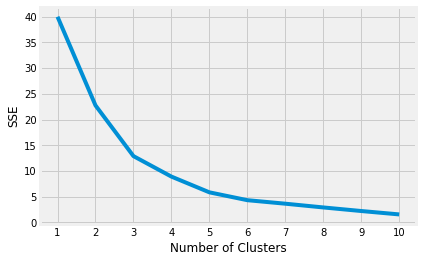

In [64]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [67]:
df, median_salary = make_moons(
    n_samples=20, noise=.05, random_state=42)
scaled_features = scaler.fit_transform(df)

In [68]:
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN(eps=0.3)

In [107]:
kmeans.fit(scaled_features) 
dbscan.fit(scaled_features)

np.unique(kmeans.labels_)

silhouette_score(df, kmeans.labels_, metric='euclidean')

dbscan_silhouette=(df, median_salary,dbscan.labels_)
dbscan_silhouette


(array([[ 1.07311891,  0.07693575],
        [ 1.64408915, -0.11261555],
        [ 1.16109598, -0.49300111],
        [ 0.86587614,  0.41636919],
        [-0.94091538,  0.35979771],
        [-0.15279762,  1.02643085],
        [ 0.04563742,  0.15648793],
        [ 0.50475629,  0.89925812],
        [ 1.9326817 ,  0.15632019],
        [ 1.46254617, -0.4049445 ],
        [ 0.54744214, -0.28698287],
        [ 0.7476359 ,  0.66156584],
        [-1.05965791, -0.0204526 ],
        [ 1.97766293,  0.57621208],
        [ 0.18979817,  0.91513691],
        [ 0.12503884, -0.19498243],
        [-0.75740976,  0.65899755],
        [ 0.03729298,  0.40817084],
        [ 0.85457503, -0.48353272],
        [-0.47634034,  0.89898493]]),
 array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1]))

Text(0.5, 1.0, 'k-means\nSilhouette: 0.33')

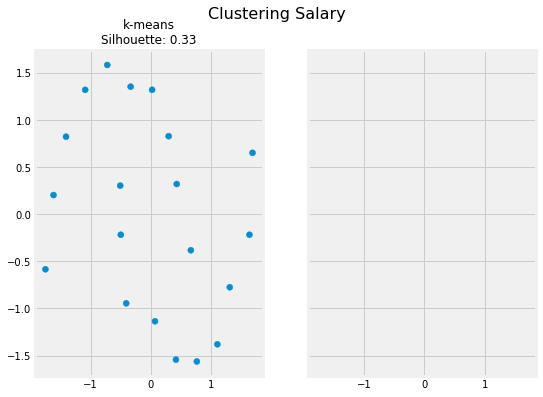

In [118]:
fig, (ax1, ax2) = plt.subplots(
1, 2, figsize=(8, 6), sharex=True, sharey=True
)


fig.suptitle(f"Clustering Salary", fontsize=16)
fte_colors = {
0: "#008fd5",
1: "#fc4f30",}


kmeans_colors = [fte_colors[0] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_colors)
ax1.set_title(
f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})